# Road Traffic Fine Management

### Expected Process

The process starts with the Create Fine that writes four variables: Amount, Points, Payment and Dismissal. Amount refers to the amount that needs to be paid by the offender, Points records the number of points that are deducted from the offender's license. Payment is the total amount that has been paid by the offender. The offender can pay the fine partly or fully at many moments in time. After the creation of the fine, the fine notification is sent by the police to the offender's place of residence. If the entire amount is paid, the fine is closed.

If a notification is sent, the offender needs to pay the postal expenses. If the offender does not pay within 180 days, a penalty is added, usually as much as the fine's amount. After being notified by post, the offender can appeal against the fine throuh a judge and/or the prefecture. If the appeal is successful, the variable dismissal is set to G or # and the case ends. If the offender does not pay, the fine is handed over for credit collection.

The fine must be sent within 90 days since it's creation else the fine expires (for non-italian residents, the limit to notify the offender is 360 days). After fine notification, the offender may only appeal to a judge/prefecture within 60 days. The prefect has 210 days to respond if you send the letter directly to his address. If the Prefect doesn't respond, the appeal is considered accepted and you will be free of debt. If you send the letter to the authority that issued you the ticket, it will have 180 days. If your appeal is accepted, your case will be archived within 120 days. If it is rejected, the Prefect will notify the offender within 150 days and the offender will have 30 days to make the payment (double the fine).

##### Revision to the law
Revisions to Italy’s highway code have been approved by the Italian parliament – new law n.120, dated 29 July, 2010.  Since August 13th  2010, the amount of time traffic fines have to be sent out to Italian residents has been reduced from 150 days to 90 days – Art. 201,1 – Notificazione delle violazioni (Notifcation of violations). For foreign residents the 360 day period for sending out fines is unchanged.

##### Appeal to a judge
Foreigners have 60 days from the notification to appeal to the judge. For Italian residents, the time limit is 30 days. If it is rejected, the offender will have 30 days to make the payment.

You have 60 days from the notification to pay your ticket. If you pay within 5 days, you'll get 30% discount for early payment. If you pay within 60 days, you can still get a discount. If you do not pay after 60 days, you will have to pay the full cost of the fine. The amount can also double.

If you do not pay after 60 days, it will become an enforcement order. Every semester, the ticket will increase by 10% due to interest. They can outsource the fine to a debt collection agency.

* Is there a situation where a case do not start with creating a fine? Done
* Are there situations where the fines is not sent within 150 days? Done
* No of cases where fine was notified and not paid 60 days later, but no penalty was added
* Are there cases where the offender appealed to a judge/prefect after 60 days?
* For cases where the the offender has appealed to the prefect, did the prefect respond within 210 days?
* How long does it take to send the fine for collection? Longer than 180 days?
* No of cases above 180 days and no penalty was added
* Amount lost due to a successful appeal? Done
* Amount not sent to credit collection agency after 180 days

In [1]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Road traffic fine manaement process.csv')
df['startTime'] = pd.to_datetime(df['startTime'])
df['completeTime'] = pd.to_datetime(df['completeTime'])
df = df.sort_values(by=['case','startTime','completeTime','event'],ascending=True).reset_index(drop=True)

df

,case,event,startTime,completeTime,amount,notificationType,expense,lastSent,paymentAmount,article,points,org:resource,dismissal,vehicleClass,totalPaymentAmount,matricola
0,A1,Create Fine,2006-07-23 23:00:00,2006-07-23 23:00:00,35.0,NaN,NaN,NaN,NaN,157,0,561,NIL,A,0.0,NaN
1,A1,Send Fine,2006-12-05 00:00:00,2006-12-05 00:00:00,35.0,NaN,11.00,NaN,NaN,157,0,561,NIL,A,0.0,NaN
2,A100,Create Fine,2006-08-01 23:00:00,2006-08-01 23:00:00,35.0,NaN,NaN,NaN,NaN,157,0,561,NIL,A,0.0,NaN
3,A100,Send Fine,2006-12-12 00:00:00,2006-12-12 00:00:00,35.0,NaN,11.00,NaN,NaN,157,0,561,NIL,A,0.0,NaN
4,A100,Insert Fine Notification,2007-01-15 00:00:00,2007-01-15 00:00:00,35.0,P,11.00,P,NaN,157,0,561,NIL,A,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561465,V9999,Create Fine,2002-09-06 23:00:00,2002-09-06 23:00:00,131.0,NaN,NaN,NaN,NaN,142,0,25,NIL,A,0.0,NaN
561466,V9999,Send Fine,2002-10-24 23:00:00,2002-10-24 23:00:00,131.0,NaN,15.16,NaN,NaN,142,0,25,NIL,A,0.0,NaN
561467,V9999,Insert Fine Notification,2002-11-04 00:00:00,2002-11-04 00:00:00,131.0,P,15.16,N,NaN,142,0,25,NIL,A,0.0,NaN
561468,V9999,Add penalty,2003-01-03 00:00:00,2003-01-03 00:00:00,262.0,P,15.16,N,NaN,142,0,25,NIL,A,0.0,NaN


In [3]:
df_copy = df.copy()
df_copy = df_copy[['case','startTime','event']]

In [4]:
df.columns

Index(['case', 'event', 'startTime', 'completeTime', 'amount',
       'notificationType', 'expense', 'lastSent', 'paymentAmount', 'article',
       'points', 'org:resource', 'dismissal', 'vehicleClass',
       'totalPaymentAmount', 'matricola'],
      dtype='object')

In [5]:
df['event'].value_counts()

Create Fine                              150370
Send Fine                                103987
Insert Fine Notification                  79860
Add penalty                               79860
Payment                                   77601
Send for Credit Collection                59013
Insert Date Appeal to Prefecture           4188
Send Appeal to Prefecture                  4141
Receive Result Appeal from Prefecture       999
Notify Result Appeal to Offender            896
Appeal to Judge                             555
Name: event, dtype: int64

In [6]:
df['startTime'].min()

Timestamp('2000-01-01 00:00:00')

In [7]:
# Variants
variants33 = df_copy.copy()
variants33['Count'] = variants33.groupby('case').cumcount()+1
variants33 = variants33.pivot(index='case', columns='Count', values='event')
variants33_col = variants33.columns
variants33 = variants33.fillna('X')
variants33 = variants33.astype('str')
variants33['Trace'] = variants33.apply(lambda x: ','.join(x),axis=1)
variants33['Trace'] = variants33['Trace'].apply(lambda x: x.replace(',X',''))
# variants

variants_num33 = variants33[['Trace',1]].groupby(['Trace'], as_index=False).count()
variants_num33 = variants_num33.sort_values(by=1, ascending=False).reset_index()
del variants_num33['index']
variants_num33 = variants_num33.reset_index()
variants_num33['index'] = variants_num33['index']+1
variants_num33 = variants_num33.rename(columns={'index':'Variants',1:'No of occurance'})

variants_num33

Count,Variants,Trace,No of occurance
0,1,"Create Fine,Send Fine,Insert Fine Notification...",54435
1,2,"Create Fine,Payment",46371
2,3,"Create Fine,Send Fine",20385
3,4,"Create Fine,Send Fine,Insert Fine Notification...",8971
4,5,"Create Fine,Send Fine,Insert Fine Notification...",3688
...,...,...,...
255,256,"Create Fine,Send Fine,Insert Fine Notification...",1
256,257,"Create Fine,Send Fine,Insert Fine Notification...",1
257,258,"Create Fine,Send Fine,Insert Fine Notification...",1
258,259,"Create Fine,Send Fine,Insert Fine Notification...",1


In [8]:
variants_num33['No of occurance'].sum()

150370

In [9]:
# Timing details
newxox2_td = df_copy.copy()
sort11 = newxox2_td.iloc[:-1,:]
sort22 = newxox2_td.iloc[1:,:].reset_index(drop=True)
sortnew2 = pd.concat([sort11,sort22],axis=1)

sortnew2.columns = ['case','startTime','startEvent','case2','endTime','endEvent']
sortnew2['Comparison'] = sortnew2.apply(lambda x: True if x['case'] == x['case2'] else False,axis=1)
sortnew2 = sortnew2[sortnew2['Comparison'] == True]
sortnew2

sortnewtime = sortnew2.copy()
sortnewtime['Duration'] = (sortnewtime['endTime'] - sortnewtime['startTime']).dt.days
sortnewtime['Duration'] = round(sortnewtime['Duration'],0)
sortnewtime['Duration'] = sortnewtime['Duration'].astype('int')

sortnewtime

,case,startTime,startEvent,case2,endTime,endEvent,Comparison,Duration
0,A1,2006-07-23 23:00:00,Create Fine,A1,2006-12-05 00:00:00,Send Fine,True,134
2,A100,2006-08-01 23:00:00,Create Fine,A100,2006-12-12 00:00:00,Send Fine,True,132
3,A100,2006-12-12 00:00:00,Send Fine,A100,2007-01-15 00:00:00,Insert Fine Notification,True,34
4,A100,2007-01-15 00:00:00,Insert Fine Notification,A100,2007-03-16 00:00:00,Add penalty,True,60
5,A100,2007-03-16 00:00:00,Add penalty,A100,2009-03-29 23:00:00,Send for Credit Collection,True,744
...,...,...,...,...,...,...,...,...
561463,V9998,2002-12-30 00:00:00,Add penalty,V9998,2004-01-10 00:00:00,Send for Credit Collection,True,376
561465,V9999,2002-09-06 23:00:00,Create Fine,V9999,2002-10-24 23:00:00,Send Fine,True,48
561466,V9999,2002-10-24 23:00:00,Send Fine,V9999,2002-11-04 00:00:00,Insert Fine Notification,True,10
561467,V9999,2002-11-04 00:00:00,Insert Fine Notification,V9999,2003-01-03 00:00:00,Add penalty,True,60


In [10]:
%timeit sortnewtime[(sortnewtime['startEvent'] == 'Create Fine') & (sortnewtime['endEvent'] == 'Send Fine')]
%timeit sortnewtime.query('startEvent=="Create Fine" & endEvent=="Send Fine" ')

84.3 ms ± 4.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
49.2 ms ± 4.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Delay in sending fine

In [11]:
delay_test = sortnewtime.copy()
delay_test['Create_Send'] = delay_test.apply(lambda x: True if (x['startEvent'] == 'Create Fine') & (x['endEvent'] == 'Send Fine') else False,axis=1)
delay_test['Late_fine_sent'] = delay_test.apply(lambda x: 1 if (x['Duration'] > 150) & (x['Create_Send'] == True) else 0,axis=1)
delay_test

,case,startTime,startEvent,case2,endTime,endEvent,Comparison,Duration,Create_Send,Late_fine_sent
0,A1,2006-07-23 23:00:00,Create Fine,A1,2006-12-05 00:00:00,Send Fine,True,134,True,0
2,A100,2006-08-01 23:00:00,Create Fine,A100,2006-12-12 00:00:00,Send Fine,True,132,True,0
3,A100,2006-12-12 00:00:00,Send Fine,A100,2007-01-15 00:00:00,Insert Fine Notification,True,34,False,0
4,A100,2007-01-15 00:00:00,Insert Fine Notification,A100,2007-03-16 00:00:00,Add penalty,True,60,False,0
5,A100,2007-03-16 00:00:00,Add penalty,A100,2009-03-29 23:00:00,Send for Credit Collection,True,744,False,0
...,...,...,...,...,...,...,...,...,...,...
561463,V9998,2002-12-30 00:00:00,Add penalty,V9998,2004-01-10 00:00:00,Send for Credit Collection,True,376,False,0
561465,V9999,2002-09-06 23:00:00,Create Fine,V9999,2002-10-24 23:00:00,Send Fine,True,48,True,0
561466,V9999,2002-10-24 23:00:00,Send Fine,V9999,2002-11-04 00:00:00,Insert Fine Notification,True,10,False,0
561467,V9999,2002-11-04 00:00:00,Insert Fine Notification,V9999,2003-01-03 00:00:00,Add penalty,True,60,False,0


In [12]:
delay_test[delay_test['Late_fine_sent'] == 1]

,case,startTime,startEvent,case2,endTime,endEvent,Comparison,Duration,Create_Send,Late_fine_sent
48,A10011,2007-03-21 00:00:00,Create Fine,A10011,2007-09-28 23:00:00,Send Fine,True,191,True,1
212,A1008,2006-08-27 23:00:00,Create Fine,A1008,2007-04-03 23:00:00,Send Fine,True,219,True,1
465,A10184,2007-03-12 00:00:00,Create Fine,A10184,2007-09-28 23:00:00,Send Fine,True,200,True,1
471,A10187,2007-03-12 00:00:00,Create Fine,A10187,2007-08-19 23:00:00,Send Fine,True,160,True,1
591,A10247,2007-03-14 00:00:00,Create Fine,A10247,2007-09-12 23:00:00,Send Fine,True,182,True,1
...,...,...,...,...,...,...,...,...,...,...
559370,V9158,2002-05-15 23:00:00,Create Fine,V9158,2002-10-24 23:00:00,Send Fine,True,162,True,1
559443,V9187,2002-06-19 23:00:00,Create Fine,V9187,2002-12-05 00:00:00,Send Fine,True,168,True,1
559546,V9233,2002-06-21 23:00:00,Create Fine,V9233,2002-11-23 00:00:00,Send Fine,True,154,True,1
559559,V9240,2002-06-26 23:00:00,Create Fine,V9240,2002-12-05 00:00:00,Send Fine,True,161,True,1


In [13]:
delay_test['startTime'].max()

Timestamp('2013-06-17 23:00:00')

### Delay Prefecture
After fine notification, the offender may only appeal to a judge/prefecture within 60 days.

In [46]:
dup_check = df_copy.copy()
dup_check['duplicates'] = dup_check.groupby(["case", "event"]).transform('cumcount')
dup_check['new_event'] = dup_check.apply(lambda x: str(x['event']) if x['duplicates'] == 0 else str(x['event']) + str(x['duplicates']),axis=1)
dup_check

,case,startTime,event,duplicates,new_event
0,A1,2006-07-23 23:00:00,Create Fine,0,Create Fine
1,A1,2006-12-05 00:00:00,Send Fine,0,Send Fine
2,A100,2006-08-01 23:00:00,Create Fine,0,Create Fine
3,A100,2006-12-12 00:00:00,Send Fine,0,Send Fine
4,A100,2007-01-15 00:00:00,Insert Fine Notification,0,Insert Fine Notification
...,...,...,...,...,...
561465,V9999,2002-09-06 23:00:00,Create Fine,0,Create Fine
561466,V9999,2002-10-24 23:00:00,Send Fine,0,Send Fine
561467,V9999,2002-11-04 00:00:00,Insert Fine Notification,0,Insert Fine Notification
561468,V9999,2003-01-03 00:00:00,Add penalty,0,Add penalty


In [48]:
dup_check['new_event'].value_counts()

Create Fine                              150370
Send Fine                                103987
Insert Fine Notification                  79860
Add penalty                               79860
Payment                                   69715
Send for Credit Collection                59013
Payment1                                   7542
Insert Date Appeal to Prefecture           4188
Send Appeal to Prefecture                  4141
Receive Result Appeal from Prefecture       999
Notify Result Appeal to Offender            896
Appeal to Judge                             555
Payment2                                    176
Payment3                                     53
Payment4                                     34
Payment5                                     27
Payment6                                     17
Payment7                                     11
Payment8                                      9
Payment9                                      9
Payment10                               

In [49]:
timing_matters = dup_check.copy()
timing_matters = timing_matters.pivot(index='case',columns='new_event', values='startTime')
timing_matters

new_event,Add penalty,Appeal to Judge,Create Fine,Insert Date Appeal to Prefecture,Insert Fine Notification,Notify Result Appeal to Offender,Payment,Payment1,Payment10,Payment11,...,Payment4,Payment5,Payment6,Payment7,Payment8,Payment9,Receive Result Appeal from Prefecture,Send Appeal to Prefecture,Send Fine,Send for Credit Collection
case,,,,,,,,,,,,,,,,,,,,,
A1,NaT,NaT,2006-07-23 23:00:00,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2006-12-05 00:00:00,NaT
A100,2007-03-16 00:00:00,NaT,2006-08-01 23:00:00,NaT,2007-01-15 00:00:00,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2006-12-12 00:00:00,2009-03-29 23:00:00
A10000,2007-09-30 23:00:00,NaT,2007-03-09 00:00:00,NaT,2007-08-01 23:00:00,NaT,2008-09-08 23:00:00,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2007-07-16 23:00:00,NaT
A10001,2007-09-22 23:00:00,NaT,2007-03-19 00:00:00,2007-08-01 23:00:00,2007-07-24 23:00:00,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2007-09-23 23:00:00,2007-07-16 23:00:00,NaT
A10004,2007-09-21 23:00:00,NaT,2007-03-20 00:00:00,NaT,2007-07-23 23:00:00,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2007-07-16 23:00:00,2009-03-29 23:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V9995,2003-01-04 00:00:00,NaT,2002-09-06 23:00:00,NaT,2002-11-05 00:00:00,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2002-10-24 23:00:00,2004-01-10 00:00:00
V9996,NaT,NaT,2002-09-06 23:00:00,NaT,NaT,NaT,2002-11-06 00:00:00,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2002-10-24 23:00:00,NaT
V9997,2003-01-03 00:00:00,NaT,2002-09-06 23:00:00,NaT,2002-11-04 00:00:00,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2002-10-24 23:00:00,2004-01-10 00:00:00


In [55]:
delay_prefecture = dup_check.copy()
delay_prefecture['Prefect_timing'] = delay_prefecture.apply(lambda x: x['Insert Date Appeal to Prefecture'] - x['Insert Fine Notification'] if x['Insert Fine Notification'] != np.nat else x['Insert Date Appeal to Prefecture'] - x['Send Fine'],axis=1)
delay_prefecture

KeyError: 'Insert Fine Notification'

In [53]:
timing_matters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150370 entries, A1 to V9999
Data columns (total 25 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Add penalty                            79860 non-null   datetime64[ns]
 1   Appeal to Judge                        555 non-null     datetime64[ns]
 2   Create Fine                            150370 non-null  datetime64[ns]
 3   Insert Date Appeal to Prefecture       4188 non-null    datetime64[ns]
 4   Insert Fine Notification               79860 non-null   datetime64[ns]
 5   Notify Result Appeal to Offender       896 non-null     datetime64[ns]
 6   Payment                                69715 non-null   datetime64[ns]
 7   Payment1                               7542 non-null    datetime64[ns]
 8   Payment10                              3 non-null       datetime64[ns]
 9   Payment11                              2 non-null    

In [50]:
# Relative duration of activities
delay_prefecture2 = df_copy.copy()
delay_prefecture2['Cum_Duration'] = delay_prefecture2.groupby(['case'])['startTime'].transform(lambda x: (x-x.iloc[0]).dt.days)
delay_prefecture2

,case,startTime,event,Cum_Duration
0,A1,2006-07-23 23:00:00,Create Fine,0
1,A1,2006-12-05 00:00:00,Send Fine,134
2,A100,2006-08-01 23:00:00,Create Fine,0
3,A100,2006-12-12 00:00:00,Send Fine,132
4,A100,2007-01-15 00:00:00,Insert Fine Notification,166
...,...,...,...,...
561465,V9999,2002-09-06 23:00:00,Create Fine,0
561466,V9999,2002-10-24 23:00:00,Send Fine,48
561467,V9999,2002-11-04 00:00:00,Insert Fine Notification,58
561468,V9999,2003-01-03 00:00:00,Add penalty,118


### Amount lost due to a successful appeal

If the appeal is successful, the case is dismissed and the dismissal value is set to G or #

In [18]:
value_needed = ['#','G']

In [19]:
successful_appeal = df.copy()
successful_appeal = successful_appeal[successful_appeal['dismissal'].isin(value_needed)].reset_index(drop=True)
successful_appeal['Total_Amount'] = successful_appeal['amount'] + successful_appeal['expense']
successful_appeal

,case,event,startTime,completeTime,amount,notificationType,expense,lastSent,paymentAmount,article,points,org:resource,dismissal,vehicleClass,totalPaymentAmount,matricola,Total_Amount
0,A10001,Send Appeal to Prefecture,2007-09-23 23:00:00,2007-09-23 23:00:00,74.0,P,13.0,P,NaN,157,0,537,#,A,0.0,NaN,87.0
1,A10102,Send Appeal to Prefecture,2007-10-24 23:00:00,2007-10-24 23:00:00,74.0,P,13.0,P,NaN,157,0,557,#,A,0.0,NaN,87.0
2,A10107,Send Appeal to Prefecture,2007-09-23 23:00:00,2007-09-23 23:00:00,74.0,P,13.0,P,NaN,157,0,557,#,A,0.0,NaN,87.0
3,A10236,Send Appeal to Prefecture,2007-10-01 23:00:00,2007-10-01 23:00:00,74.0,P,13.0,P,NaN,157,0,559,#,A,0.0,NaN,87.0
4,A10411,Send Appeal to Prefecture,2007-10-30 00:00:00,2007-10-30 00:00:00,44.0,P,13.0,P,NaN,7,0,541,#,A,0.0,NaN,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,V9464,Send Appeal to Prefecture,2003-01-08 00:00:00,2003-01-08 00:00:00,262.0,P,10.0,N,NaN,142,0,25,#,A,0.0,NaN,272.0
2139,V9635,Send Appeal to Prefecture,2003-01-07 00:00:00,2003-01-07 00:00:00,65.5,P,10.0,N,NaN,142,0,25,#,M,0.0,NaN,75.5
2140,V9684,Send Appeal to Prefecture,2003-04-06 23:00:00,2003-04-06 23:00:00,262.0,P,10.0,N,NaN,142,0,25,#,A,0.0,NaN,272.0
2141,V9766,Send Appeal to Prefecture,2003-02-15 00:00:00,2003-02-15 00:00:00,65.5,P,10.0,N,NaN,142,0,25,#,A,0.0,NaN,75.5


In [20]:
successful_appeal['Total_Amount'].sum()

293960.81000000006

In [21]:
2376/150370 *100

1.5801024140453548

In [22]:
# Variants
variants = df_copy.copy()
variants['Count'] = variants.groupby('case').cumcount()+1
variants = variants.pivot(index='case', columns='Count', values='event')
variants_col = variants.columns
variants = variants.fillna('X')
variants = variants.astype('str')
variants['Trace'] = variants.apply(lambda x: ','.join(x),axis=1)
variants['Trace'] = variants['Trace'].apply(lambda x: x.replace(',X',''))
# variants

variants_num = variants[['Trace',1]].groupby(['Trace'], as_index=False).count()
variants_num = variants_num.sort_values(by=1, ascending=False).reset_index()
del variants_num['index']
variants_num = variants_num.reset_index()
variants_num['index'] = variants_num['index']+1
variants_num = variants_num.rename(columns={'index':'Variants',1:'No of occurance'})
# variants_num

df_piv_2 = df_copy.copy()
df_piv_2['count'] = df_piv_2.groupby('case').cumcount()+1
df_piv_2 = df_piv_2.pivot(index='case', columns='count', values='event')


def last_activity(a):
    if a.last_valid_index() is None:
        return np.nan
    else:
        return a[a.last_valid_index()]

df_piv_2['Last_Event'] = df_piv_2.apply(last_activity, axis=1)
df_piv_2['First_Event'] = df_piv_2[1]
df_piv_2 = df_piv_2.drop(variants_col, axis=1)
df_piv_2  = df_piv_2.reset_index()
# df_piv_2

df_case = df_copy.copy()
df_case['count'] = df_case.groupby('case').cumcount() + 1
df_case = df_case.pivot(index='case', columns='count',values='startTime')
df_case['Max'] = df_case.apply(max, axis=1)
df_case['Case_Duration'] = (df_case['Max'] - df_case[1]).dt.days
df_case = df_case.drop(variants_col, axis=1)
df_case = df_case.reset_index()
# df_case

var_finale = variants.merge(df_piv_2, on='case')
var_finale = var_finale.drop(variants_col, axis=1)
var_finale = var_finale.merge(df_case, on='case').drop(['Max'], axis=1)
var_finale = var_finale.merge(variants_num, on='Trace').drop(['No of occurance','Trace'], axis=1)
# var_finale.to_csv('Liquidação por Arbitramento_variants.csv', index=False)
var_finale

,case,Last_Event,First_Event,Case_Duration,Variants
0,A1,Send Fine,Create Fine,134,3
1,A10012,Send Fine,Create Fine,133,3
2,A10041,Send Fine,Create Fine,130,3
3,A10045,Send Fine,Create Fine,130,3
4,A10054,Send Fine,Create Fine,131,3
...,...,...,...,...,...
150365,V8700,Send for Credit Collection,Create Fine,770,178
150366,V8809,Payment,Create Fine,448,140
150367,V9180,Payment,Create Fine,334,140
150368,V9576,Payment,Create Fine,797,149


In [23]:
happ_path = df.merge(var_finale, on='case')
happ_path = happ_path[happ_path['Variants'] == 1].reset_index(drop=True)
happ_path

,case,event,startTime,completeTime,amount,notificationType,expense,lastSent,paymentAmount,article,points,org:resource,dismissal,vehicleClass,totalPaymentAmount,matricola,Last_Event,First_Event,Case_Duration,Variants
0,A100,Create Fine,2006-08-01 23:00:00,2006-08-01 23:00:00,35.0,NaN,NaN,NaN,NaN,157,0,561,NIL,A,0.0,NaN,Send for Credit Collection,Create Fine,971,1
1,A100,Send Fine,2006-12-12 00:00:00,2006-12-12 00:00:00,35.0,NaN,11.00,NaN,NaN,157,0,561,NIL,A,0.0,NaN,Send for Credit Collection,Create Fine,971,1
2,A100,Insert Fine Notification,2007-01-15 00:00:00,2007-01-15 00:00:00,35.0,P,11.00,P,NaN,157,0,561,NIL,A,0.0,NaN,Send for Credit Collection,Create Fine,971,1
3,A100,Add penalty,2007-03-16 00:00:00,2007-03-16 00:00:00,71.5,P,11.00,P,NaN,157,0,561,NIL,A,0.0,NaN,Send for Credit Collection,Create Fine,971,1
4,A100,Send for Credit Collection,2009-03-29 23:00:00,2009-03-29 23:00:00,71.5,P,11.00,P,NaN,157,0,561,NIL,A,0.0,NaN,Send for Credit Collection,Create Fine,971,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272170,V9999,Create Fine,2002-09-06 23:00:00,2002-09-06 23:00:00,131.0,NaN,NaN,NaN,NaN,142,0,25,NIL,A,0.0,NaN,Send for Credit Collection,Create Fine,490,1
272171,V9999,Send Fine,2002-10-24 23:00:00,2002-10-24 23:00:00,131.0,NaN,15.16,NaN,NaN,142,0,25,NIL,A,0.0,NaN,Send for Credit Collection,Create Fine,490,1
272172,V9999,Insert Fine Notification,2002-11-04 00:00:00,2002-11-04 00:00:00,131.0,P,15.16,N,NaN,142,0,25,NIL,A,0.0,NaN,Send for Credit Collection,Create Fine,490,1
272173,V9999,Add penalty,2003-01-03 00:00:00,2003-01-03 00:00:00,262.0,P,15.16,N,NaN,142,0,25,NIL,A,0.0,NaN,Send for Credit Collection,Create Fine,490,1


In [24]:
happ_path22 = happ_path.copy()
happ_path22 = happ_path22[['case','startTime','event']]
happ_path22

,case,startTime,event
0,A100,2006-08-01 23:00:00,Create Fine
1,A100,2006-12-12 00:00:00,Send Fine
2,A100,2007-01-15 00:00:00,Insert Fine Notification
3,A100,2007-03-16 00:00:00,Add penalty
4,A100,2009-03-29 23:00:00,Send for Credit Collection
...,...,...,...
272170,V9999,2002-09-06 23:00:00,Create Fine
272171,V9999,2002-10-24 23:00:00,Send Fine
272172,V9999,2002-11-04 00:00:00,Insert Fine Notification
272173,V9999,2003-01-03 00:00:00,Add penalty


In [25]:
# Deriving the first and last activities of the cases to get the most frequent occuring start and end activities

activities_list = happ_path22.copy()
activities_list['count'] = activities_list.groupby('case').cumcount()+1
activities_list = activities_list.pivot(index='case', columns='count', values='event')
# activities_list_full

# Get the last valid index (last activity per case)
def func(x):
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]
    
activities_list['Last Activity'] = activities_list.apply(func, axis=1)
activities_list['First Activity'] = activities_list[1]
# activities_list

# Start Activities ccp
start_act = activities_list.groupby(['First Activity']).size()
start_act = start_act.to_frame(name='Weight').reset_index()
start_act['Start'] = 'Start'
start_act = start_act[['Start','First Activity','Weight']]
start_act = start_act.sort_values(by='Weight', ascending=False).reset_index(drop=True)
# start_act

# End Activities ccp
end_act = activities_list.groupby(['Last Activity']).size()
end_act = end_act.to_frame(name='Weight').reset_index()
end_act['End'] = 'End'
end_act = end_act[['Last Activity','End','Weight']]
end_act = end_act.sort_values(by='Weight', ascending=False).reset_index(drop=True)
# end_act

# Timing details
# newxox2_td = newxox2[['lawsuit_id','date','movement']]
sort11 = happ_path22.iloc[:-1,:]
sort22 = happ_path22.iloc[1:,:].reset_index(drop=True)
sortnew2 = pd.concat([sort11,sort22],axis=1)

sortnew2.columns = ['case','startTime','startEvent','case2','endTime','endEvent']
sortnew2['Comparison'] = sortnew2.apply(lambda x: True if x['case'] == x['case2'] else False,axis=1)
sortnew2 = sortnew2[sortnew2['Comparison'] == True]
# sortnew2

sortnewtimetest = sortnew2.copy()
sortnewtimetest['Duration'] = (sortnewtimetest['endTime'] - sortnewtimetest['startTime']).dt.days

sortnewtimetest = sortnewtimetest[['startEvent','endEvent','Duration']]
sortnewtimetest = sortnewtimetest.groupby(['startEvent','endEvent']).agg({'Duration': ['mean'],'startEvent':['count']}).reset_index()
sortnewtimetest.columns = ['startEvent','endEvent', 'Duration', 'Count']
sortnewtimetest['Duration'] = round(sortnewtimetest['Duration'],0)
sortnewtimetest['Duration'] = sortnewtimetest['Duration'].astype('int')

sortnewtimetest

,startEvent,endEvent,Duration,Count
0,Add penalty,Send for Credit Collection,526,54435
1,Create Fine,Send Fine,87,54435
2,Insert Fine Notification,Add penalty,60,54435
3,Send Fine,Insert Fine Notification,19,54435


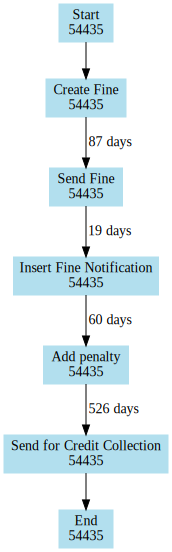

In [26]:
f = graphviz.Digraph('neato', format='png', encoding='utf8',
            filename='corleone', node_attr={'color': 'lightblue2', 'style': 'filled'})
f.attr('node', shape='box')

# create all the possible nodes first
# you can modify the `label` 

for index, row in start_act.iterrows():
    f.node(row['Start'],label=row['Start'] + '\n '+ str(row['Weight']))
    f.node(row['First Activity'],label=row['First Activity'] + '\n '+ str(row['Weight']))
#     ,_attributes={'color':'red' if row['S']=='M' else 'lightblue2'})

for index, row in start_act.iterrows():
    f.edge(str(row["Start"]), str(row["First Activity"]), label="")
#     f.edge(str(row["ParentID"]), str(row["ID"]), label='')

#####################################################

for index, row in sortnewtimetest.iterrows():
    f.node(row['startEvent'],label=row['startEvent'] + '\n '+ str(row['Count']))
    f.node(row['endEvent'],label=row['endEvent'] + '\n '+ str(row['Count']))
#     ,_attributes={'color':'red' if row['S']=='M' else 'lightblue2'})

for index, row in sortnewtimetest.iterrows():
    f.edge(str(row["startEvent"]), str(row["endEvent"]), label=" " + str(row["Duration"]) + " days")
#     f.edge(str(row["ParentID"]), str(row["ID"]), label='')

######################################################
for index, row in end_act.iterrows():
    f.node(row['Last Activity'],label=row['Last Activity'] + '\n '+ str(row['Weight']))
    f.node(row['End'],label=row['End'] + '\n '+ str(row['Weight']))


for index, row in end_act.iterrows():
    f.edge(str(row["Last Activity"]), str(row["End"]), label="")


    
f

In [27]:
# Deriving the first and last activities of the cases to get the most frequent occuring start and end activities

df_full = df.copy()
df_full = df_full[['case','startTime','event']]

activities_list_full = df_full.copy()
activities_list_full['count'] = activities_list_full.groupby('case').cumcount()+1
activities_list_full = activities_list_full.pivot(index='case', columns='count', values='event')
# activities_list_full

# Get the last valid index (last activity per case)
def func(x):
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]
    
activities_list_full['Last Activity'] = activities_list_full.apply(func, axis=1)
activities_list_full['First Activity'] = activities_list_full[1]
# activities_list

# Start Activities ccp
start_act_full = activities_list_full.groupby(['First Activity']).size()
start_act_full = start_act_full.to_frame(name='Weight').reset_index()
start_act_full['Start'] = 'Start'
start_act_full = start_act_full[['Start','First Activity','Weight']]
start_act_full = start_act_full.sort_values(by='Weight', ascending=False).reset_index(drop=True)
# start_act

# End Activities ccp
end_act_full = activities_list_full.groupby(['Last Activity']).size()
end_act_full = end_act_full.to_frame(name='Weight').reset_index()
end_act_full['End'] = 'End'
end_act_full = end_act_full[['Last Activity','End','Weight']]
end_act_full = end_act_full.sort_values(by='Weight', ascending=False).reset_index(drop=True)
# end_act

# Timing details
# newxox2_td = newxox2[['lawsuit_id','date','movement']]
sort11_full = df_full.iloc[:-1,:]
sort22_full = df_full.iloc[1:,:].reset_index(drop=True)
sortnew2_full = pd.concat([sort11_full,sort22_full],axis=1)

sortnew2_full.columns = ['Case','Start Time','Start Event','Case_2','End Time','End Event']
sortnew2_full['Comparison'] = sortnew2_full.apply(lambda x: True if x['Case'] == x['Case_2'] else False,axis=1)
sortnew2_full = sortnew2_full[sortnew2_full['Comparison'] == True]
# sortnew2

sortnewtime_full = sortnew2_full.copy()
sortnewtime_full['Duration'] = (sortnewtime_full['End Time'] - sortnewtime_full['Start Time']).dt.days

sortnewtime_full = sortnewtime_full[['Start Event','End Event','Duration']]
# sortnewtime_full['Duration'] = sortnewtime_full['Duration'].apply(lambda x: round(x.total_seconds(),0))
sortnewtime_full = sortnewtime_full.groupby(['Start Event','End Event']).agg({'Duration': ['mean'],'Start Event':['count']}).reset_index()
sortnewtime_full.columns = ['Start Event','End Event', 'Duration', 'Count']
sortnewtime_full['Duration'] = round(sortnewtime_full['Duration'],0)
sortnewtime_full['Duration'] = sortnewtime_full['Duration'].astype('int')

sortnewtime_full

,Start Event,End Event,Duration,Count
0,Add penalty,Appeal to Judge,77,80
1,Add penalty,Insert Date Appeal to Prefecture,38,658
2,Add penalty,Notify Result Appeal to Offender,69,53
3,Add penalty,Payment,161,18621
4,Add penalty,Receive Result Appeal from Prefecture,50,351
...,...,...,...,...
68,Send Fine,Insert Date Appeal to Prefecture,35,281
69,Send Fine,Insert Fine Notification,18,76864
70,Send Fine,Payment,50,3305
71,Send Fine,Send Appeal to Prefecture,23,4


In [28]:
# Hfull = graphviz.Digraph(format='png')

# Hfull.attr(rankdir='TB')
# Hfull.attr('node', shape='rectangle', width='0', height='0')
# Hfull.attr('edge', arrowhead='vee', arrowtail='inv')

# max_node = 3
# max_start_act = start_act_full['Weight'].max()

# nodelistfull = []
# for idx, row in start_act_full.iterrows():
#     node112, node222, weight222 = [str(i) for i in row]
    
#     if node112 not in nodelistfull:
#         Hfull.node(node112, style='filled', fillcolor='green', fontcolor='green', shape='rectangle')
#         nodelistfull.append(node222)
#     if node222 not in nodelistfull:
#         Hfull.node(node222)
#         nodelistfull.append(node222)
        
#     Hfull.edge(node112, node222, label = 'Count: '+ weight222, penwidth=str(int(weight222)/max_start_act*max_node))
    
# max_case_id = sortnewtime_full['Count'].max()    
# nodelistfull_2 = []
# for idx, row in sortnewtime_full.iterrows():
#     node11, node22, duration, count = [str(i) for i in row]
    
#     if node11 not in nodelistfull_2:
#         Hfull.node(node11)
#         nodelistfull_2.append(node22)
#     if node22 not in nodelistfull_2:
#         Hfull.node(node22)
#         nodelistfull_2.append(node22)
        
#     Hfull.edge(node11, node22, label = 'Count: '+ count + '\nDuration: ' + duration, labeljust='l', labeldistance='2.5', labelangle='20', penwidth=str(int(count)/max_case_id*max_node))

# max_end_act = end_act_full['Weight'].max()
# nodelistfull_3 = []
# for idx, row in end_act_full.iterrows():
#     node113, node223, weight333 = [str(i) for i in row]
    
#     if node113 not in nodelistfull_3:
#         Hfull.node(node113)
#         nodelistfull_3.append(node223)
#     if node222 not in nodelistfull_3:
#         Hfull.node(node223, style='filled', fillcolor='red', fontcolor='red', shape='rectangle')
#         nodelistfull_3.append(node223)
        
#     Hfull.edge(node113, node223, label = 'Count: '+ weight333, penwidth=str(int(weight333)/max_end_act*max_node))
# # Hfull.render('Italyy', view=True)
# Hfull

In [29]:
# Variants
variants33 = df.copy()
variants33['Count'] = variants33.groupby('case').cumcount()+1
variants33 = variants33.pivot(index='case', columns='Count', values='event')
variants33_col = variants33.columns
variants33 = variants33.fillna('X')
variants33 = variants33.astype('str')
variants33['Trace'] = variants33.apply(lambda x: ','.join(x),axis=1)
variants33['Trace'] = variants33['Trace'].apply(lambda x: x.replace(',X',''))
# variants

variants_num33 = variants33[['Trace',1]].groupby(['Trace'], as_index=False).count()
variants_num33 = variants_num33.sort_values(by=1, ascending=False).reset_index()
del variants_num33['index']
variants_num33 = variants_num33.reset_index()
variants_num33['index'] = variants_num33['index']+1
variants_num33 = variants_num33.rename(columns={'index':'Variants',1:'No of occurance'})

variants_num33

Count,Variants,Trace,No of occurance
0,1,"Create Fine,Send Fine,Insert Fine Notification...",54435
1,2,"Create Fine,Payment",46371
2,3,"Create Fine,Send Fine",20385
3,4,"Create Fine,Send Fine,Insert Fine Notification...",8971
4,5,"Create Fine,Send Fine,Insert Fine Notification...",3688
...,...,...,...
255,256,"Create Fine,Send Fine,Insert Fine Notification...",1
256,257,"Create Fine,Send Fine,Insert Fine Notification...",1
257,258,"Create Fine,Send Fine,Insert Fine Notification...",1
258,259,"Create Fine,Send Fine,Insert Fine Notification...",1


In [30]:
variants_num33['Trace'][5]

'Create Fine,Send Fine,Insert Fine Notification,Payment,Add penalty,Payment'

In [31]:
sortnewtime_full[sortnewtime_full['End Event'] == 'Send for Credit Collection']

,Start Event,End Event,Duration,Count
6,Add penalty,Send for Credit Collection,527,57182
14,Appeal to Judge,Send for Credit Collection,907,32
39,Notify Result Appeal to Offender,Send for Credit Collection,595,257
49,Payment,Send for Credit Collection,444,1538
56,Receive Result Appeal from Prefecture,Send for Credit Collection,541,1
65,Send Appeal to Prefecture,Send for Credit Collection,91,3


In [36]:
df_copy

,case,startTime,event
0,A1,2006-07-23 23:00:00,Create Fine
1,A1,2006-12-05 00:00:00,Send Fine
2,A100,2006-08-01 23:00:00,Create Fine
3,A100,2006-12-12 00:00:00,Send Fine
4,A100,2007-01-15 00:00:00,Insert Fine Notification
...,...,...,...
561465,V9999,2002-09-06 23:00:00,Create Fine
561466,V9999,2002-10-24 23:00:00,Send Fine
561467,V9999,2002-11-04 00:00:00,Insert Fine Notification
561468,V9999,2003-01-03 00:00:00,Add penalty


,case,startTime,event,Payment_check1
91031,C17607,2007-02-21 00:00:00,Payment,10
91032,C17607,2007-05-01 23:00:00,Payment,11
93855,C19108,2008-08-25 23:00:00,Payment,10
96816,C20817,2010-12-03 00:00:00,Payment,10
96817,C20817,2011-01-13 00:00:00,Payment,11
96818,C20817,2011-01-31 00:00:00,Payment,12
96819,C20817,2011-03-16 00:00:00,Payment,13
96820,C20817,2011-04-08 23:00:00,Payment,14


,case,startTime,event,Payment_check1,new_event
0,A1,2006-07-23 23:00:00,Create Fine,0,Create Fine
1,A1,2006-12-05 00:00:00,Send Fine,0,Send Fine
2,A100,2006-08-01 23:00:00,Create Fine,0,Create Fine
3,A100,2006-12-12 00:00:00,Send Fine,0,Send Fine
4,A100,2007-01-15 00:00:00,Insert Fine Notification,0,Insert Fine Notification
...,...,...,...,...,...
561465,V9999,2002-09-06 23:00:00,Create Fine,0,Create Fine
561466,V9999,2002-10-24 23:00:00,Send Fine,0,Send Fine
561467,V9999,2002-11-04 00:00:00,Insert Fine Notification,0,Insert Fine Notification
561468,V9999,2003-01-03 00:00:00,Add penalty,0,Add penalty


In [45]:
dup_check['new_event'].value_counts()

Create Fine                              150370
Send Fine                                103987
Insert Fine Notification                  79860
Add penalty                               79860
Payment                                   69715
Send for Credit Collection                59013
Payment1                                   7542
Insert Date Appeal to Prefecture           4188
Send Appeal to Prefecture                  4141
Receive Result Appeal from Prefecture       999
Notify Result Appeal to Offender            896
Appeal to Judge                             555
Payment2                                    176
Payment3                                     53
Payment4                                     34
Payment5                                     27
Payment6                                     17
Payment7                                     11
Payment8                                      9
Payment9                                      9
Payment10                               